# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (1, 0)_, ground truth _(g1, g2) = (1, 1), h0 = 0, (wx, wh, b1, w, b2) = (1, 1, 1, 1, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[Please check the related pdf files in the assignment folder]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [7]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow GRUCell
This section shows an example how to build a RNN network using an GRU cell. GRU cell is an inbuilt class in tensorflow which implements the real behavior of the GRU neuron. 

Reference: 
1. [TensorFlow GRU cell](https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/contrib/rnn/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [3]:
from tensorflow.contrib.rnn import GRUCell

In [8]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
loss_to_record =tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))
init = tf.global_variables_initializer()

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [9]:
X_gen,y_gen=create_dataset(64,8)
X_val=X_gen[:32,]
y_val=y_gen[:32,]
X_train=X_gen[32:,]
y_train=y_gen[32:,]

In [10]:
batch_xs, batch_ys = X_train[0*8:(0+1)*8], y_train[0*8:(0+1)*8]

epoch 1: train acc = 0.421875
epoch 2: train acc = 0.5625
epoch 3: train acc = 0.53125
epoch 4: train acc = 0.53125
epoch 5: train acc = 0.515625
epoch 6: train acc = 0.609375
epoch 7: train acc = 0.546875
epoch 8: train acc = 0.625
epoch 9: train acc = 0.765625
epoch 10: train acc = 0.84375
epoch 11: train acc = 0.96875
epoch 12: train acc = 1.0
epoch 13: train acc = 1.0
epoch 14: train acc = 1.0
epoch 15: train acc = 1.0
epoch 16: train acc = 1.0
epoch 17: train acc = 1.0
epoch 18: train acc = 1.0
epoch 19: train acc = 1.0
epoch 20: train acc = 1.0
val acc = 1.0


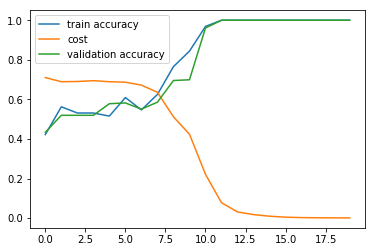

In [11]:
# YOUR TRAINING AND PLOTTING CODE HERE
init = tf.global_variables_initializer()
num_train = 32
batch_size = 8
num_batch = num_train//batch_size
train_acc_hist=[]
val_acc_hist=[]
cost_hist=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(20):
        for i in range(num_batch):
            batch_xs, batch_ys = X_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={input_data: batch_xs, output_data: batch_ys})
        cost, train_acc = sess.run([loss_to_record,accuracy], feed_dict={input_data: batch_xs, output_data: batch_ys})
        train_acc_hist.append(train_acc)
        cost_hist.append(cost)
        print('epoch {}: train acc = {}'.format(e+1, train_acc))
        val_acc = sess.run(accuracy, feed_dict={input_data: X_val, output_data: y_val})
        val_acc_hist.append(val_acc)
    print('val acc = {}'.format(val_acc))
    
plt.plot(train_acc_hist, label="train accuracy")
plt.plot(cost_hist, label="cost")
plt.plot(val_acc_hist, label="validation accuracy")
plt.legend()
plt.show()

## Task 1, Part 3 :  Build your own GRUCell
In this part, you need to build your own GRU cell to achieve the GRU functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyGRUCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [12]:
from ecbm4040.xor.rnn import MyGRUCell

In [13]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = MyGRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
loss_to_record =tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))
init = tf.global_variables_initializer()

### Training

epoch 1: train acc = 0.46875
epoch 2: train acc = 0.4375
epoch 3: train acc = 0.53125
epoch 4: train acc = 0.546875
epoch 5: train acc = 0.5625
epoch 6: train acc = 0.578125
epoch 7: train acc = 0.453125
epoch 8: train acc = 0.53125
epoch 9: train acc = 0.53125
epoch 10: train acc = 0.53125
epoch 11: train acc = 0.53125
epoch 12: train acc = 0.53125
epoch 13: train acc = 0.515625
epoch 14: train acc = 0.484375
epoch 15: train acc = 0.515625
epoch 16: train acc = 0.515625
epoch 17: train acc = 0.515625
epoch 18: train acc = 0.515625
epoch 19: train acc = 0.53125
epoch 20: train acc = 0.5
val acc = 0.51953125


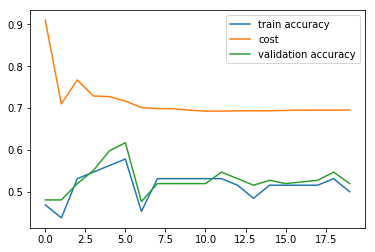

In [14]:
# YOUR TRAINING AND PLOTTING CODE HERE
# I implamented the GRU Cell described by Andrew NG : https://www.youtube.com/watch?v=PjMcA_NlB_8&t=592s
num_train = 32
batch_size = 8
num_batch = num_train//batch_size
train_acc_hist=[]
val_acc_hist=[]
cost_hist=[]
with tf.Session() as sess:
    sess.run(init)
    for e in range(20):
        for i in range(num_batch):
            batch_xs, batch_ys = X_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={input_data: batch_xs, output_data: batch_ys})
        cost, train_acc = sess.run([loss_to_record,accuracy], feed_dict={input_data: batch_xs, output_data: batch_ys})
        train_acc_hist.append(train_acc)
        cost_hist.append(cost)
        print('epoch {}: train acc = {}'.format(e+1, train_acc))
        val_acc = sess.run(accuracy, feed_dict={input_data: X_val, output_data: y_val})
        val_acc_hist.append(val_acc)
    print('val acc = {}'.format(val_acc))
    
plt.plot(train_acc_hist, label="train accuracy")
plt.plot(cost_hist, label="cost")
plt.plot(val_acc_hist, label="validation accuracy")
plt.legend()
plt.show()